In [ ]:
!pip install nltk
import nltk

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import pandas as pd

import re
import string

from string import punctuation
from nltk.corpus import stopwords

stop_words = stopwords.words('indonesian')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm, naive_bayes
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import confusion_matrix,accuracy_score, classification_report

In [ ]:
!pip install sastrawi

     |████████████████████████████████| 209 kB 4.3 MB/s 


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [ ]:
#feature extraction
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

Read the data

In [ ]:
bisnis = pd.read_csv('/content/bisnis.csv')
lifestyle = pd.read_csv('/content/lifestyle.csv')
sport = pd.read_csv('/content/sport.csv')

In [ ]:
bisnis['label'] = pd.Series('bisnis', index=bisnis.index)
lifestyle['label'] = pd.Series('lifestyle', index=lifestyle.index)
sport['label'] = pd.Series('sport', index=sport.index)

In [ ]:
dataset = pd.concat([bisnis, lifestyle, sport], ignore_index=True)

In [ ]:
dataset.head()

,Unnamed: 0,id,url,title,content,label
0,0,0,https://www.tribunnews.com/bisnis/2020/10/06/s...,\n\t\t\t\t\t\tSektor Pertanian Tumbuh Signifik...,"b'TRIBUNNEWS.COM, JAKARTA -- Pemerintah optimi...",bisnis
1,1,1,https://www.tribunnews.com/bisnis/2020/10/06/t...,\n\t\t\t\t\t\tTekan Jokowi Soal UU Cipta Kerja...,"b'Laporan Wartawan Tribunnews.com, Yanuar Riez...",bisnis
2,2,2,https://www.tribunnews.com/bisnis/2020/10/06/c...,\n\t\t\t\t\t\tCara Dapatkan Listik Gratis Bula...,b'TRIBUNNEWS.COM - Masyarakat Indonesia dapat ...,bisnis
3,3,3,https://www.tribunnews.com/bisnis/2020/10/06/p...,\n\t\t\t\t\t\tPerbandingan UU Cipta Kerja yang...,"b'TRIBUNNEWS.COM, JAKARTA -\xc2\xa0 Pemerintah...",bisnis
4,4,4,https://www.tribunnews.com/bisnis/2020/10/06/p...,\n\t\t\t\t\t\tProtes Risiko Lingkungan di UU C...,"b'Laporan Wartawan Tribunnews.com, Yanuar Riez...",bisnis


In [ ]:
#preprocessing function
def preprocessing(sentence):
    
    #lowercasing
    sentence = sentence.lower()
    sentence = re.sub(r"b'\S+", "", sentence)
    sentence = re.sub(r"https\S+", "", sentence)
    sentence = re.sub(r"x\S+", "", sentence)
    
    #remove white spaces
    sentence = sentence.strip()
    
    #tokenization
    words = sentence.split()
    
    #remove punctuation/ special character
    remove_table = str.maketrans("", "", punctuation)
    words = [x.translate(remove_table) for x in words]

    #remove nonalphanumeric <=3 chars
    words = [x for x in words if x.isalnum() and len(x) > 3]
    
    # stemming
    words = [stemmer.stem(w) for w in words]
    
    #remove stopwords
    words = [x for x in words if x not in stop_words]

    #rejoining the words
    sentence = " ".join(words)
    
    return sentence

In [ ]:
dataset.head()

,Unnamed: 0,id,url,title,content,label
0,0,0,https://www.tribunnews.com/bisnis/2020/10/06/s...,\n\t\t\t\t\t\tSektor Pertanian Tumbuh Signifik...,"b'TRIBUNNEWS.COM, JAKARTA -- Pemerintah optimi...",bisnis
1,1,1,https://www.tribunnews.com/bisnis/2020/10/06/t...,\n\t\t\t\t\t\tTekan Jokowi Soal UU Cipta Kerja...,"b'Laporan Wartawan Tribunnews.com, Yanuar Riez...",bisnis
2,2,2,https://www.tribunnews.com/bisnis/2020/10/06/c...,\n\t\t\t\t\t\tCara Dapatkan Listik Gratis Bula...,b'TRIBUNNEWS.COM - Masyarakat Indonesia dapat ...,bisnis
3,3,3,https://www.tribunnews.com/bisnis/2020/10/06/p...,\n\t\t\t\t\t\tPerbandingan UU Cipta Kerja yang...,"b'TRIBUNNEWS.COM, JAKARTA -\xc2\xa0 Pemerintah...",bisnis
4,4,4,https://www.tribunnews.com/bisnis/2020/10/06/p...,\n\t\t\t\t\t\tProtes Risiko Lingkungan di UU C...,"b'Laporan Wartawan Tribunnews.com, Yanuar Riez...",bisnis


In [ ]:
dataset.drop(['Unnamed: 0','id','url','title'], axis=1, inplace=True)

In [ ]:
dataset

,content,label
0,"b'TRIBUNNEWS.COM, JAKARTA -- Pemerintah optimi...",bisnis
1,"b'Laporan Wartawan Tribunnews.com, Yanuar Riez...",bisnis
2,b'TRIBUNNEWS.COM - Masyarakat Indonesia dapat ...,bisnis
3,"b'TRIBUNNEWS.COM, JAKARTA -\xc2\xa0 Pemerintah...",bisnis
4,"b'Laporan Wartawan Tribunnews.com, Yanuar Riez...",bisnis
...,...,...
115,"b'TRIBUNNEWS.COM - Ajang Balapan MotoGP 2020, ...",sport
116,"b'TRIBUNNEWS.COM - Ajang Balapan MotoGP 2020, ...",sport
117,"b'TRIBUNNEWS.COM - Ajang Balapan MotoGP 2020, ...",sport
118,"b'TRIBUNNEWS.COM - Ajang Balapan MotoGP 2020, ...",sport


In [ ]:
dataset['clean'] =  dataset['content'].apply(preprocessing)

In [ ]:
dataset.drop(['content'], axis=1, inplace=True)

In [ ]:
dataset = dataset[['clean', 'label']]

In [ ]:
dataset

,clean,label
0,jakarta perintah optimistis sektor tani sangga...,bisnis
1,wartawan tribunnewscom yanuar riezqi yovanda t...,bisnis
2,masyarakat indonesia nikmat token listrik grat...,bisnis
3,jakarta perintah resmi kesah omnibus rancang u...,bisnis
4,wartawan tribunnewscom yanuar riezqi yovanda t...,bisnis
...,...,...
115,ajang balap motogp 2020 gelar pekan minggu 111...,sport
116,ajang balap motogp 2020 gelar pekan minggu 111...,sport
117,ajang balap motogp 2020 gelar pekan minggu 111...,sport
118,ajang balap motogp 2020 gelar pekan minggu 111...,sport


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset['clean'], dataset['label'], test_size=0.25)

In [ ]:
y_train = y_train.map({'bisnis':0, 'lifestyle':1, 'sport':2})
y_test = y_test.map({'bisnis':0, 'lifestyle':1, 'sport':2})

In [ ]:
stop_words = stop_words.extend(['tribunnewscom'])
cv = CountVectorizer()
X_train_vect = cv.fit_transform(X_train)
X_test_vect = cv.transform(X_test)

# LR

In [ ]:
#logistic regression
LR = LogisticRegression()
LR.fit(X_train_vect, y_train)

predicted_lr = LR.predict(X_test_vect)
accuracy_score(y_test, predicted_lr)
print(classification_report(y_test, predicted_lr))
print(confusion_matrix(y_test, predicted_lr))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.69      1.00      0.82         9
           2       1.00      0.77      0.87        13

    accuracy                           0.87        30
   macro avg       0.90      0.88      0.87        30
weighted avg       0.91      0.87      0.87        30

[[ 7  1  0]
 [ 0  9  0]
 [ 0  3 10]]


Confusion matrix, without normalization
[[ 7  1  0]
 [ 0  9  0]
 [ 0  3 10]]


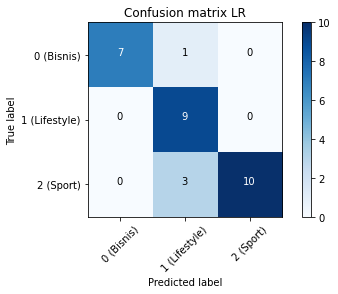

In [ ]:
lr_cm = confusion_matrix(y_test, predicted_lr)
plot(lr_cm, classes=["0 (Bisnis)","1 (Lifestyle)","2 (Sport)"], title='Confusion matrix LR')

#SVM

In [ ]:
# Modeling with SVM
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(X_train_vect, y_train)
svm_predicted = SVM.predict(X_test_vect)
accuracy_score(y_test, svm_predicted)

0.8666666666666667

In [ ]:
print(classification_report(y_test, svm_predicted))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.69      1.00      0.82         9
           2       1.00      0.77      0.87        13

    accuracy                           0.87        30
   macro avg       0.90      0.88      0.87        30
weighted avg       0.91      0.87      0.87        30



Confusion matrix, without normalization
[[ 7  1  0]
 [ 0  9  0]
 [ 0  3 10]]


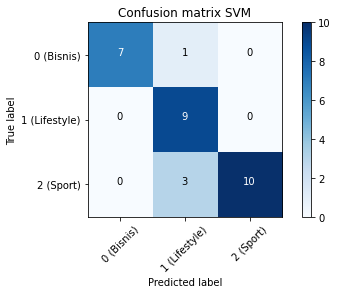

In [ ]:
svm_cm = confusion_matrix(y_test, svm_predicted)
plot(svm_cm, classes=["0 (Bisnis)","1 (Lifestyle)","2 (Sport)"], title='Confusion matrix SVM')

# NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train_vect, y_train)
predicted2 = clf.predict(X_test_vect)
accuracy_score(y_test,predicted2)

1.0

In [ ]:
print(classification_report(y_test, predicted2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Confusion matrix, without normalization
[[ 8  0  0]
 [ 0  9  0]
 [ 0  0 13]]


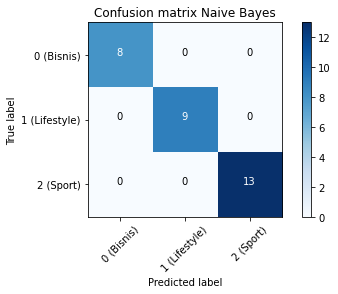

In [ ]:
nb_cm = confusion_matrix(y_test, predicted2)
plot(nb_cm, classes=["0 (Bisnis)","1 (Lifestyle)","2 (Sport)"], title='Confusion matrix Naive Bayes')

# DECISION TREE

In [ ]:
DT = DecisionTreeClassifier()
DT.fit(X_train_vect, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dt_predicted = DT.predict(X_test_vect)

In [ ]:
accuracy_score(y_test, dt_predicted)

0.9333333333333333

In [ ]:
print(classification_report(y_test, dt_predicted))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.90      1.00      0.95         9
           2       1.00      0.92      0.96        13

    accuracy                           0.93        30
   macro avg       0.92      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



Confusion matrix, without normalization
[[ 7  1  0]
 [ 0  9  0]
 [ 1  0 12]]


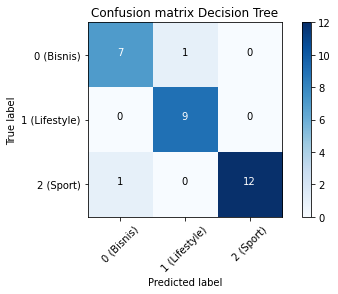

In [ ]:
dt_cm = confusion_matrix(y_test, dt_predicted)
plot(dt_cm, classes=["0 (Bisnis)","1 (Lifestyle)","2 (Sport)"], title='Confusion matrix Decision Tree')

#Random Forest with TF-IDF Vectorizer and Grid Search

In [ ]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(dataset['clean'], dataset['label'], test_size=0.25)

In [ ]:
#Tf-idf
tfidf = TfidfVectorizer()
x_train_vect = tfidf.fit_transform(x_train2)
x_test_vect = tfidf.transform(x_test2)
y_train = y_train2.map({'bisnis':0, 'lifestyle':1, 'sport':2})
y_test = y_test2.map({'bisnis':0, 'lifestyle':1, 'sport':2})

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [1,2,3,4,10,15],
     'min_samples_leaf': [3, 5,10,20,30],
     'min_samples_split': [4, 8, 10, 12],
     'n_estimators': [3,5,10,15]
}
# Create a base model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(x_train_vect, y_train)
grid_search.best_params_
rf = grid_search.best_estimator_
rf.fit(x_train_vect,y_train)
rf_pred = rf.predict(x_test_vect)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 1098 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:   20.4s finished


In [ ]:
print(classification_report(y_test,rf_pred))
rf_matrix = confusion_matrix(y_test,rf_pred)

              precision    recall  f1-score   support

           0       1.00      0.79      0.88        14
           1       0.75      1.00      0.86         9
           2       1.00      1.00      1.00         7

    accuracy                           0.90        30
   macro avg       0.92      0.93      0.91        30
weighted avg       0.93      0.90      0.90        30



Confusion matrix, without normalization
[[11  3  0]
 [ 0  9  0]
 [ 0  0  7]]


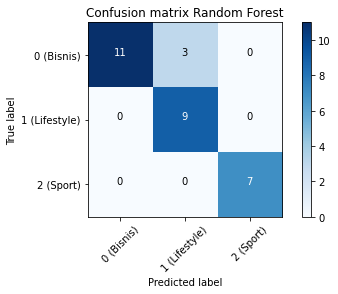

In [ ]:
plot(rf_matrix, classes=["0 (Bisnis)","1 (Lifestyle)","2 (Sport)"], title='Confusion matrix Random Forest')

In [ ]:
headline = pd.Series('KKP Izinkan Tangkap Ikan Pakai Jaring Tarik Berkantong, Apa Bedanya dengan Cantrang?', index = [0])

In [ ]:
cv_headline = cv.transform(headline)

In [ ]:
clf.predict(cv_headline)

array([1])